In [1]:

import torch
import torchvision
from torch import nn 
#from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image 
import numpy as np
import random
import dataset_utils
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('final_dataset.csv',index_col=0)
tform = transforms.Compose([transforms.Resize((64,64)),transforms.PILToTensor(),transforms.ConvertImageDtype(torch.float),transforms.Normalize(0.5,0.5)])
image_dataset = torchvision.datasets.ImageFolder("image_dataset/",transform=tform)
species2genus = dataset_utils.species_label_to_genus_label(df,image_dataset)

In [3]:

batch_size = 1000 
import random
import dataset_utils
img2dna = dataset_utils.get_imgs_bold_id(image_dataset,df)

nucleotides = df[['nucleotide','species_name','genus_name','processid','image_urls']]
colonna_dna = df.loc[:,"nucleotide"]
nucleotides.loc[:,'nucleotide'] = colonna_dna.apply(dataset_utils.one_hot_encoding)
random.seed(42)

X_train_val, X_test, y_train_val, y_test = dataset_utils.data_split(nucleotides,0.2,random_state=42)
print(y_test)
train_data = X_train_val
train_data['species_name'] = y_train_val

X_train, X_validation, y_train, y_validation = dataset_utils.data_split(train_data,0.2,drop_labels=False,random_state=42)
train_indices, val_indices, test_indices = dataset_utils.image_splits_from_df(X_train,X_validation,X_test,image_dataset)
'''from torch.utils.data import Dataset, DataLoader
 
class WholeDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.targets = data.targets#torch.tensor(targets)
        #self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index][0]
        y = self.targets[index]
        
        return x, y
    
    def __len__(self):
        return len(self.data)
        
whole_dataset = WholeDataset(image_dataset)
n_classes = np.unique(whole_dataset.targets).shape[0]
print(len(test_indices+val_indices+train_indices))
len(whole_dataset)

train_imgs = torch.utils.data.Subset(whole_dataset, train_indices)
val_imgs = torch.utils.data.Subset(whole_dataset, val_indices)
test_imgs = torch.utils.data.Subset(whole_dataset, test_indices)
len(train_imgs)+len(val_imgs)+len(test_imgs)
train_loader = torch.utils.data.DataLoader(train_imgs, batch_size=batch_size,shuffle=False, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_imgs, batch_size=2000,shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_imgs, batch_size=4,shuffle=False, num_workers=2)
del test_loader
dataloaders = {"train":train_loader,"val":val_loader}
dataset_sizes = {'train': len(train_imgs.indices), 'val':len(val_imgs.indices)}

described_species_labels = np.array([image_dataset.targets[i] for i in train_indices])
described_species_labels = np.unique(described_species_labels)'''

365    Bembidion normannum
292       Bledius gallicus
321       Praxis edwardsii
352        Andrena pilipes
18     Automeris managuana
              ...         
412         Hemiceras losa
413         Hemiceras losa
417     Hemiceras punctata
418         Hemiceras losa
421     Hemiceras punctata
Name: species_name, Length: 9991, dtype: object


'from torch.utils.data import Dataset, DataLoader\n \nclass WholeDataset(Dataset):\n    def __init__(self, data, transform=None):\n        self.data = data\n        self.targets = data.targets#torch.tensor(targets)\n        #self.transform = transform\n        \n    def __getitem__(self, index):\n        x = self.data[index][0]\n        y = self.targets[index]\n        \n        return x, y\n    \n    def __len__(self):\n        return len(self.data)\n        \nwhole_dataset = WholeDataset(image_dataset)\nn_classes = np.unique(whole_dataset.targets).shape[0]\nprint(len(test_indices+val_indices+train_indices))\nlen(whole_dataset)\n\ntrain_imgs = torch.utils.data.Subset(whole_dataset, train_indices)\nval_imgs = torch.utils.data.Subset(whole_dataset, val_indices)\ntest_imgs = torch.utils.data.Subset(whole_dataset, test_indices)\nlen(train_imgs)+len(val_imgs)+len(test_imgs)\ntrain_loader = torch.utils.data.DataLoader(train_imgs, batch_size=batch_size,shuffle=False, num_workers=2)\nval_load

In [4]:
train_labels = np.array(image_dataset.imgs)[train_indices][:,1].astype(int)
val_labels = np.array(image_dataset.imgs)[val_indices][:,1].astype(int)

In [5]:
val_labels

array([   1,    1,    2, ..., 1049, 1049, 1049])

In [6]:

y_train = y_train.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])
y_test = y_test.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])
y_validation= y_validation.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])
y_train_val = y_train_val.apply(lambda x: image_dataset.class_to_idx[x.replace(' ','_')])

In [7]:
###ROBA NUOVA AAA
n_described_val = 0
n_undescribed_val = 0
for vv in np.unique(y_validation):
    if vv in np.unique(y_train):
        n_described_val +=1
    else:
        n_undescribed_val +=1

print(n_described_val)
print(n_undescribed_val)
n_described_test = 0
n_undescribed_test = 0
for vv in np.unique(y_test):
    if vv in np.unique(y_train_val):
        n_described_test +=1
    else:
        n_undescribed_test +=1

print(n_described_test)
print(n_undescribed_test)

650
132
797
215


In [8]:
class DNAdataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.tensor(targets)
        #self.transform = transform
        
    def __getitem__(self, index):
        x = torch.tensor(np.float32(self.data[index][0])).unsqueeze(0)
        y = self.targets[index]
        
        #if self.transform:
        #    x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1,2,0))
        #    x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)
d_train = DNAdataset(X_train.values, y_train.values)
d_val = DNAdataset(X_validation.values, y_validation.values)
d_test = DNAdataset(X_test.values, y_test.values)

In [9]:
dataloader_train = DataLoader(d_train, batch_size=32,shuffle=True)
dataloader_val = DataLoader(d_val, batch_size=32,shuffle=True)
dataloaders = {'train':dataloader_train,'val':dataloader_val}
dataset_sizes = {'train': d_train.data.shape[0], 'val':d_val.data.shape[0]}

In [10]:

from tqdm.notebook import tqdm
def fit(epochs,dataloaders,optimizer,model,start_idx=0):
    criterion = torch.nn.CrossEntropyLoss()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    torch.cuda.empty_cache()
    
    train_losses = []
    train_scores = []
    val_losses = []
    val_scores = []
    for epoch in range(epochs):
        running_train_corrects = 0
        for dnas,labels in tqdm(dataloaders['train']):
            model.train()
            dnas = dnas.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            
            predicted_labels = model(dnas)
            train_loss = criterion(predicted_labels,labels)
            train_loss.backward()
            optimizer.step()
            
            _, preds = torch.max(predicted_labels, 1)
            #print(preds)
            #print(labels.data)
            running_train_corrects += torch.sum(preds == labels.data)
        train_losses.append(train_loss)
        
        running_val_corrects = 0
        for dnas,labels in tqdm(dataloaders['val']):
            
            model.eval()
            with torch.no_grad():
                dnas = dnas.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                
                predicted_labels = model(dnas)
                val_loss = criterion(predicted_labels,labels)
                
                _, preds = torch.max(predicted_labels, 1)
                #print(preds)
                #print(labels.data)
                running_val_corrects += torch.sum(preds == labels.data)
        val_losses.append(val_loss)
        
        
        
        #real_scores.append(real_score)
        #fit_p.writer.add_scalar('loss_g', loss_g, epoch)
        # Log losses & scores (last batch)
        
        epoch_train_acc = running_train_corrects.double() / dataset_sizes['train']
        epoch_val_acc = running_val_corrects.double() / dataset_sizes['val']
        print("Epoch [{}/{}], train_loss: {:.4f},  train_score: {:.4f},val_loss: {:.4f},  val_score: {:.4f}".format(
            epoch+1, epochs, train_loss, epoch_train_acc,val_loss,epoch_val_acc))
        #print(f"class accuracy real {class_accuracy_real}")
    
    return train_losses

In [40]:
class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        #self.linear1 = torch.nn.Linear(658, 200)
        self.conv1 = torch.nn.Conv2d(1,64,(5,1))
        self.activation1 = torch.nn.LeakyReLU()
        self.drop1 = torch.nn.Dropout()
        self.norm1 = torch.nn.BatchNorm2d(64)
        self.conv2 = torch.nn.Conv2d(64,16,(5,1))
        self.activation2 = torch.nn.LeakyReLU()
        self.norm2 = torch.nn.BatchNorm2d(16)
        self.drop2 = torch.nn.Dropout()
        self.conv3 = torch.nn.Conv2d(16,1,(5,1))
        self.activation3 = torch.nn.LeakyReLU()
        self.norm3 = torch.nn.BatchNorm2d(1)
        self.drop3 = torch.nn.Dropout()

        self.main = nn.Sequential(self.conv1,self.activation1,self.norm1,self.drop1,
                                  self.conv2,self.activation2,self.norm2,self.drop2,
                                  self.conv3,self.activation3,self.norm3,self.drop3,
        )
        self.flat = torch.nn.Flatten()
        self.gru = nn.GRU(3230,1000,bidirectional=True)
        self.linear = nn.Linear(2000,1050)
    def forward(self, x):
        #print(x.shape)
        x=self.main(x)
        #print(x.shape)
        x=self.flat(x)
        x,_=self.gru(x)
        x=self.linear(x)
        return x
    def feature_extract(self,x):
        #print(x.shape)
        x=self.main(x)
        x=self.flat(x)
        x0 = x
        x,_=self.gru(x)
        #print(x.shape)
        #print(x0.shape)
        x = torch.cat((x,x0),dim=1)
        return x

tinymodel = TinyModel()
tinymodel.cuda()
 
optimizer = torch.optim.Adam(tinymodel.parameters(),weight_decay=1e-5)


In [41]:
n_params = dataset_utils.count_trainable_parameters(tinymodel);
print(n_params)

27498813


In [42]:
fit(40,dataloaders,optimizer,tinymodel)

  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [1/40], train_loss: 0.2830,  train_score: 0.4004,val_loss: 7.4342,  val_score: 0.4287


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [2/40], train_loss: 0.1357,  train_score: 0.9376,val_loss: 9.1344,  val_score: 0.4631


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [3/40], train_loss: 0.0339,  train_score: 0.9713,val_loss: 7.0707,  val_score: 0.4629


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [4/40], train_loss: 0.0212,  train_score: 0.9812,val_loss: 5.0414,  val_score: 0.4664


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [5/40], train_loss: 0.0827,  train_score: 0.9807,val_loss: 9.6092,  val_score: 0.4670


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [6/40], train_loss: 0.0353,  train_score: 0.9805,val_loss: 8.5948,  val_score: 0.4666


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [7/40], train_loss: 0.3322,  train_score: 0.9799,val_loss: 6.9236,  val_score: 0.4675


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [8/40], train_loss: 0.0277,  train_score: 0.9813,val_loss: 6.4630,  val_score: 0.4663


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [9/40], train_loss: 0.0601,  train_score: 0.9824,val_loss: 6.0561,  val_score: 0.4613


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [10/40], train_loss: 0.0838,  train_score: 0.9810,val_loss: 4.9705,  val_score: 0.4678


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [11/40], train_loss: 0.0367,  train_score: 0.9828,val_loss: 8.2408,  val_score: 0.4693


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [12/40], train_loss: 0.7703,  train_score: 0.9846,val_loss: 8.0886,  val_score: 0.4678


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [13/40], train_loss: 0.1371,  train_score: 0.9859,val_loss: 3.9980,  val_score: 0.4684


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [14/40], train_loss: 0.0606,  train_score: 0.9819,val_loss: 9.5566,  val_score: 0.4687


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [15/40], train_loss: 0.0223,  train_score: 0.9827,val_loss: 10.3663,  val_score: 0.4677


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [16/40], train_loss: 0.0239,  train_score: 0.9858,val_loss: 4.6926,  val_score: 0.4684


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [17/40], train_loss: 0.0074,  train_score: 0.9838,val_loss: 8.5362,  val_score: 0.4675


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [18/40], train_loss: 0.0903,  train_score: 0.9815,val_loss: 8.1873,  val_score: 0.4694


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [19/40], train_loss: 0.0004,  train_score: 0.9881,val_loss: 8.5971,  val_score: 0.4710


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [20/40], train_loss: 0.0421,  train_score: 0.9827,val_loss: 10.2033,  val_score: 0.4694


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [21/40], train_loss: 0.1807,  train_score: 0.9875,val_loss: 4.0834,  val_score: 0.4707


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [22/40], train_loss: 0.0041,  train_score: 0.9871,val_loss: 8.4232,  val_score: 0.4694


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [23/40], train_loss: 0.0017,  train_score: 0.9878,val_loss: 7.8271,  val_score: 0.4700


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [24/40], train_loss: 0.0014,  train_score: 0.9858,val_loss: 8.8281,  val_score: 0.4709


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [25/40], train_loss: 0.0125,  train_score: 0.9850,val_loss: 8.6934,  val_score: 0.4673


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [26/40], train_loss: 0.0015,  train_score: 0.9835,val_loss: 10.3655,  val_score: 0.4721


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [27/40], train_loss: 0.0187,  train_score: 0.9868,val_loss: 12.7324,  val_score: 0.4700


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [28/40], train_loss: 0.0016,  train_score: 0.9892,val_loss: 9.8747,  val_score: 0.4710


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [29/40], train_loss: 0.1051,  train_score: 0.9843,val_loss: 10.0848,  val_score: 0.4684


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [30/40], train_loss: 0.0163,  train_score: 0.9863,val_loss: 7.4617,  val_score: 0.4693


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [31/40], train_loss: 0.0065,  train_score: 0.9856,val_loss: 12.3891,  val_score: 0.4716


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [32/40], train_loss: 0.0263,  train_score: 0.9887,val_loss: 11.7033,  val_score: 0.4712


  0%|          | 0/339 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Epoch [33/40], train_loss: 0.0675,  train_score: 0.9897,val_loss: 16.1877,  val_score: 0.4717


  0%|          | 0/339 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [43]:
torch.cuda.empty_cache()

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import importlib 
import extract_features
importlib.reload(extract_features)
((expanded_train_dna_features,expanded_train_dna_labels),
 (expanded_val_dna_features,expanded_val_dna_labels), 
 (expanded_test_dna_features,expanded_test_dna_labels)) = extract_features.extract_expanded_dna_features(tinymodel,device,save_to_disk=True)

365    Bembidion normannum
292       Bledius gallicus
321       Praxis edwardsii
352        Andrena pilipes
18     Automeris managuana
              ...         
412         Hemiceras losa
413         Hemiceras losa
417     Hemiceras punctata
418         Hemiceras losa
421     Hemiceras punctata
Name: species_name, Length: 9991, dtype: object
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size([32, 2000])
torch.Size([32, 3230])
torch.Size(

/home/fogliodicarta/Desktop/InsectClassification/extract_features.py:268: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.save(torch.tensor(expanded_train_dna_features),save_name_prefix+'dna_train_features.pt')
/home/fogliodicarta/Desktop/InsectClassification/extract_features.py:269: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.save(torch.tensor(expanded_train_dna_labels),save_name_prefix+'dna_train_labels.pt')
/home/fogliodicarta/Desktop/InsectClassification/extract_features.py:270: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


# parte dopo non usabile perche in questo branch ho diviso una funzione extract features a parte

# Random Forest

In [45]:
train_dna_features = expanded_train_dna_features
val_dna_features = expanded_val_dna_features
train_dna_labels = expanded_train_dna_labels 
val_dna_labels = expanded_val_dna_labels 


In [46]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(train_dna_features,train_dna_labels )

In [47]:
train_predicted_labels = clf.predict(train_dna_features)
print(f"Training species accuracy:{np.count_nonzero(train_predicted_labels==train_dna_labels.numpy())/len(train_dna_labels)}")

Training species accuracy:0.9997699210062121


In [48]:
val_predicted_labels= clf.predict(val_dna_features)
print(f"Validation species accuracy:{np.count_nonzero(val_predicted_labels==val_dna_labels.numpy())/len(val_dna_labels)}")

Validation species accuracy:0.4570812365204889


In [49]:

temp_val_predicted_probs = clf.predict_proba(val_dna_features)
val_predicted_probs = np.zeros((len(temp_val_predicted_probs),1050))
for i, cls in enumerate(np.arange(1050)):
    if cls in clf.classes_:
        val_predicted_probs[:, cls] = temp_val_predicted_probs[:, list(clf.classes_).index(cls)]
import math
n_correct_genus = 0
for i in range(len(val_dna_labels)):
    #label_best_specie = val_predicted_probs[i].argmax()
    label_best_specie = val_predicted_labels[i]
    assert(val_predicted_labels[i]==val_predicted_probs[i].argmax())
    genus_of_best_species = species2genus[label_best_specie.item()]
    #species_same_genus = [k for k,v in species2genus.items() if v == genus_of_best_species]
    #reduced_species = val_predicted_probs[i][species_same_genus]
    #normalized_reduced_species = reduced_species/(reduced_species.sum())
    
    real_genus = species2genus[val_dna_labels[i].item()]
    predicted_genus = genus_of_best_species
    if real_genus == predicted_genus:
        n_correct_genus+=1
print(f"Validation genus accuracy: {n_correct_genus/len(val_dna_labels)}")


Validation genus accuracy: 0.7863407620416967


In [50]:
def entropy_per_symbol(v):
    if len(v)==1:
        return 0.0
    entropy = 0 
    n_zeros = 0
    for p in v:
        if p != 0:
            entropy-=p*math.log(p,2)
        else:
            n_zeros +=1
    #print(f"n_zeros:{n_zeros}")
    #FORSE VA TOLTO N_ZEROS DALLA LENGTH
    mean_symbol_entropy = entropy/math.log(len(normalized_reduced_species),2)
    return mean_symbol_entropy

In [51]:

described_species_labels = np.array([image_dataset.targets[i] for i in train_indices])
described_species_labels = np.unique(described_species_labels)
tprs = []
fprs = []
correct_genus_rate = []
correct_species_rate = []
for t in range(0,100,1):
    entropy_threshold = t/100.0
    #print(val_predicted_probs.shape)
    n_undescribed_samples = 0
    n_described_samples = 0
    n_correct_undescribed_samples = 0
    n_correct_described_samples = 0
    n_correct_genus = 0 
    n_correct_species = 0 
    for i in range(len(val_dna_labels)):
        #label_best_specie = val_predicted_probs[i].argmax()
        label_best_specie = val_predicted_labels[i]
        assert(val_predicted_labels[i]==val_predicted_probs[i].argmax())
        genus_of_best_species = species2genus[label_best_specie.item()]
        species_same_genus = [k for k,v in species2genus.items() if v == genus_of_best_species]
        #print(val_labels[i])
        #print(label_best_specie)
        #print(species_same_genus)
        reduced_species = val_predicted_probs[i][species_same_genus]
        normalized_reduced_species = reduced_species/(reduced_species.sum())
        #print(normalized_reduced_species)
        H_s = entropy_per_symbol(normalized_reduced_species)
        #print(H_s)
        #print("Genus" if H_s > entropy_threshold else "Species")
        #input() 
        if val_dna_labels[i].item() in described_species_labels:
            #tn
            n_described_samples +=1
            if H_s < entropy_threshold:
                n_correct_described_samples+=1
                if label_best_specie == val_dna_labels[i]:
                    n_correct_species+=1
        else:
            #tp
            n_undescribed_samples+=1
            if H_s >= entropy_threshold:
                n_correct_undescribed_samples+=1
                real_genus = species2genus[val_dna_labels[i].item()]
                predicted_genus = genus_of_best_species
                if real_genus == predicted_genus:
                    n_correct_genus+=1
            
        
            
    tprs.append(n_correct_undescribed_samples/n_undescribed_samples)#TPR = recall = sensitivity
    fprs.append(1-n_correct_described_samples/n_described_samples)#1-TNR = 1 - specificity
    correct_genus_rate.append(n_correct_genus/n_undescribed_samples)
    correct_species_rate.append(n_correct_species/n_described_samples)

KeyboardInterrupt: 

In [ ]:

plt.plot(fprs,tprs)
plt.xlim([0, 1])
plt.ylim([0, 1])

In [ ]:
fprs[1]

In [ ]:
tprs[1]

In [ ]:
train_dna_labels.shape

In [ ]:
plt.plot(correct_genus_rate)

In [ ]:
plt.plot(correct_species_rate)

In [ ]:
chhh = 12
correct_species_rate[chhh]

In [ ]:
correct_genus_rate[chhh]

In [ ]:
train_dna_features.shape

In [ ]:
for i,row in enumerate(df['image_urls']):
    print(i,sep=" ")
    print(row)
    input()

In [108]:
img2dna[list(img2dna)[38]]


'DIRTT100-14'

In [113]:
(img2dna)


{'image_dataset/Leucania_cruegeri/10ANIC_08059+1288052608.jpg': 'ANICL062-10',
 'image_dataset/Lestica_alata/BC_ZSM_HYM_24216+1440710108.jpg': 'BCHYM11106-15',
 'image_dataset/Liotryphon_punctulatus/BC-ZSM-HYM-27761-D07+1429045164.jpg': 'BCHYM7643-15',
 'image_dataset/Lesmone_formularis/06-SRNP-109430_DHJ609430+1199992320.jpg': 'BLPBC407-07',
 'image_dataset/Lesmone_formularis/07-SRNP-101378_DHJ611342+1174583648.jpg': 'BLPBE439-07',
 'image_dataset/Lesmone_formularis/07-SRNP-106954_DHJ616918+1188495614.jpg': 'BLPCC469-08',
 'image_dataset/Lesmone_formularis/07-SRNP-112250_DHJ622214+1202911152.jpg': 'BLPCI125-08',
 'image_dataset/Lesmone_formularis/07-SRNP-113574_DHJ623538+1204038314.jpg': 'BLPCJ509-08',
 'image_dataset/Lesmone_formularis/08-SRNP-108981-DHJ633045+1364926698.jpg': 'BLPDE146-09',
 'image_dataset/Lesmone_gentilis/12-SRNP-100569-DHJ667502+1344956152.JPG': 'BLPEE570-12',
 'image_dataset/Leucania_comma/IMG_9917+1238606356.JPG': 'CGUKC237-09',
 'image_dataset/Limodromus_assimi

In [15]:
X_test.shape

(9991, 5)

In [18]:
n_

12430

In [173]:
len(np.unique(list(img2dna_indices.values())))

10839

(array([1235., 1246., 1355., 1434., 1079., 1326., 1337., 1478., 1444.,
        1105.]),
 array([    0. ,  3242.3,  6484.6,  9726.9, 12969.2, 16211.5, 19453.8,
        22696.1, 25938.4, 29180.7, 32423. ]),
 <BarContainer object of 10 artists>)

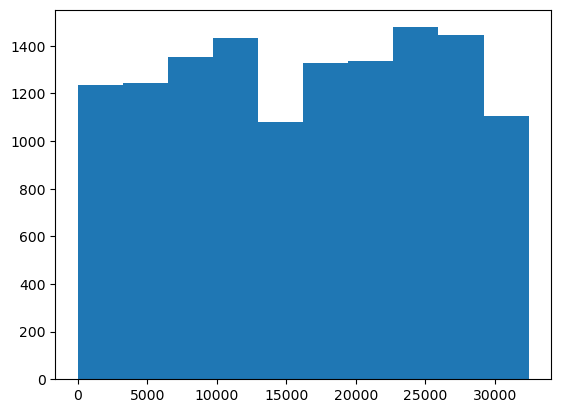

In [176]:

plt.hist(np.unique(list(img2dna_indices.keys())))